In [0]:
pip install gensim

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
pip install --upgrade numpy

Python interpreter will be restarted.
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Not uninstalling numpy at /databricks/python3/lib/python3.9/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-c0b1a201-97c8-4679-89e7-56626beca679
    Can't uninstall 'numpy'. No files were found to uninstall.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 1.25.1 which is incompatible.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.25.1 which is incompatible.
Python interpreter will be restarted.


In [0]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
# gensim is for word and text similarity modeling, started with LDA stype topic modeling and grew into SVD and neural word representations

In [0]:
# load the data
glove_file = datapath('/Workspace/Repos/ZhangStanley@JohnDeere.com/Stan_testing/Production_Rules/Other/Practice_files071023/glove.6B.50d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

<command-6862325493584>:4: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)


Out[4]: (400000, 50)

In [0]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [0]:
model.most_similar('obama')

Out[6]: [('barack', 0.9674172401428223),
 ('bush', 0.9642481207847595),
 ('clinton', 0.9606045484542847),
 ('mccain', 0.9122934937477112),
 ('dole', 0.8878742456436157),
 ('gore', 0.884803831577301),
 ('hillary', 0.8776551485061646),
 ('rodham', 0.8401790261268616),
 ('kerry', 0.8261427879333496),
 ('biden', 0.8095825910568237)]

In [0]:
model.most_similar('banana')

Out[7]: [('bananas', 0.8152028322219849),
 ('coconut', 0.7872511148452759),
 ('pineapple', 0.7579814791679382),
 ('mango', 0.7556402087211609),
 ('beet', 0.7212650179862976),
 ('fruit', 0.7181406021118164),
 ('sugar', 0.7180197834968567),
 ('growers', 0.7165752649307251),
 ('peanut', 0.7018107771873474),
 ('cranberry', 0.6957994699478149)]

In [0]:
model.most_similar(negative='banana')

Out[8]: [('silberbauer', 0.7262376546859741),
 ('waddington', 0.6286618709564209),
 ('shalem', 0.6120830178260803),
 ('haukeland', 0.5962643027305603),
 ('n.y.u.', 0.5937072038650513),
 ('fiddes', 0.593668520450592),
 ('kühnen', 0.5929498076438904),
 ('3450', 0.5929349064826965),
 ('academicals', 0.590404748916626),
 ('manston', 0.5903598666191101)]

In [0]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.8524


In [0]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [0]:
analogy('japan', 'japanese', 'australia')

Out[11]: 'australian'

In [0]:
analogy('australia', 'beer', 'france')

Out[12]: 'champagne'

In [0]:
analogy('obama', 'clinton', 'reagan')

Out[13]: 'nixon'

In [0]:
analogy('tall', 'tallest', 'long')

Out[14]: 'longest'

In [0]:
analogy('good', 'fantastic', 'bad')

Out[15]: 'dreadful'

In [0]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [0]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.key_to_index.keys()), sample)
        else:
            words = [ word for word in model.key_to_index]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

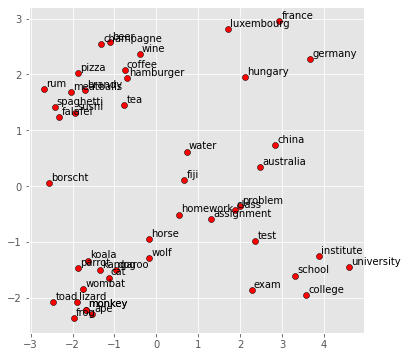

In [0]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

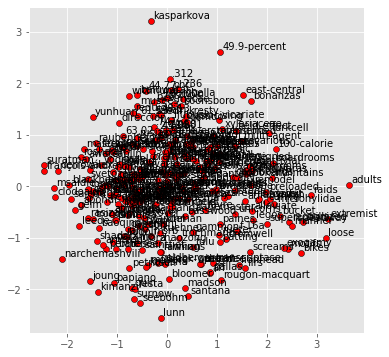

In [0]:
display_pca_scatterplot(model, sample=300)